<a href="https://colab.research.google.com/github/Ashutosh-Bahet/Customer-Segmentation/blob/main/Copy_of_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
!pip install umap-learn

from umap import UMAP

In [ ]:
market= pd.read_csv("/content/marketing_campaign.csv",sep="\t")
print("Number of datapoints:", len(market))
market.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
market.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
market['Total Purchase']=market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']+market['NumWebVisitsMonth']

In [ ]:
market=market.dropna()
print("The total number of data-points after removing the rows with missing values are:",len(market))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
market.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Purchase
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,20.199910
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,7.283193
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,14.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,19.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,46.000000


In [ ]:
market["Age"]=2024-market["Year_Birth"]
market["spent"]= market["MntWines"]+ market["MntFruits"]+ market["MntMeatProducts"]+ market["MntFishProducts"]+ market["MntSweetProducts"]+ market["MntGoldProds"]
market["Status"]=market["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
market["Children"]=market["Kidhome"]+market["Teenhome"]
market["Family_Size"] = market["Status"].replace({"Alone": 1, "Partner":2})+ market["Children"]
market["Status"]=market["Status"].replace({"Alone":1,"Partner":2})
market["Is_Parent"] = np.where(market.Children> 0, 1, 0)
market["Education"]=market["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
market=market.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
market= market.drop(to_drop, axis=1)
market["Education"]=market["Education"].replace({"Undergraduate":1,"Graduate":2,"Postgraduate":3})



<ipython-input-99-3b50f7519543>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  market["Family_Size"] = market["Status"].replace({"Alone": 1, "Partner":2})+ market["Children"]
<ipython-input-99-3b50f7519543>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  market["Status"]=market["Status"].replace({"Alone":1,"Partner":2})
<ipython-input-99-3b50f7519543>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=

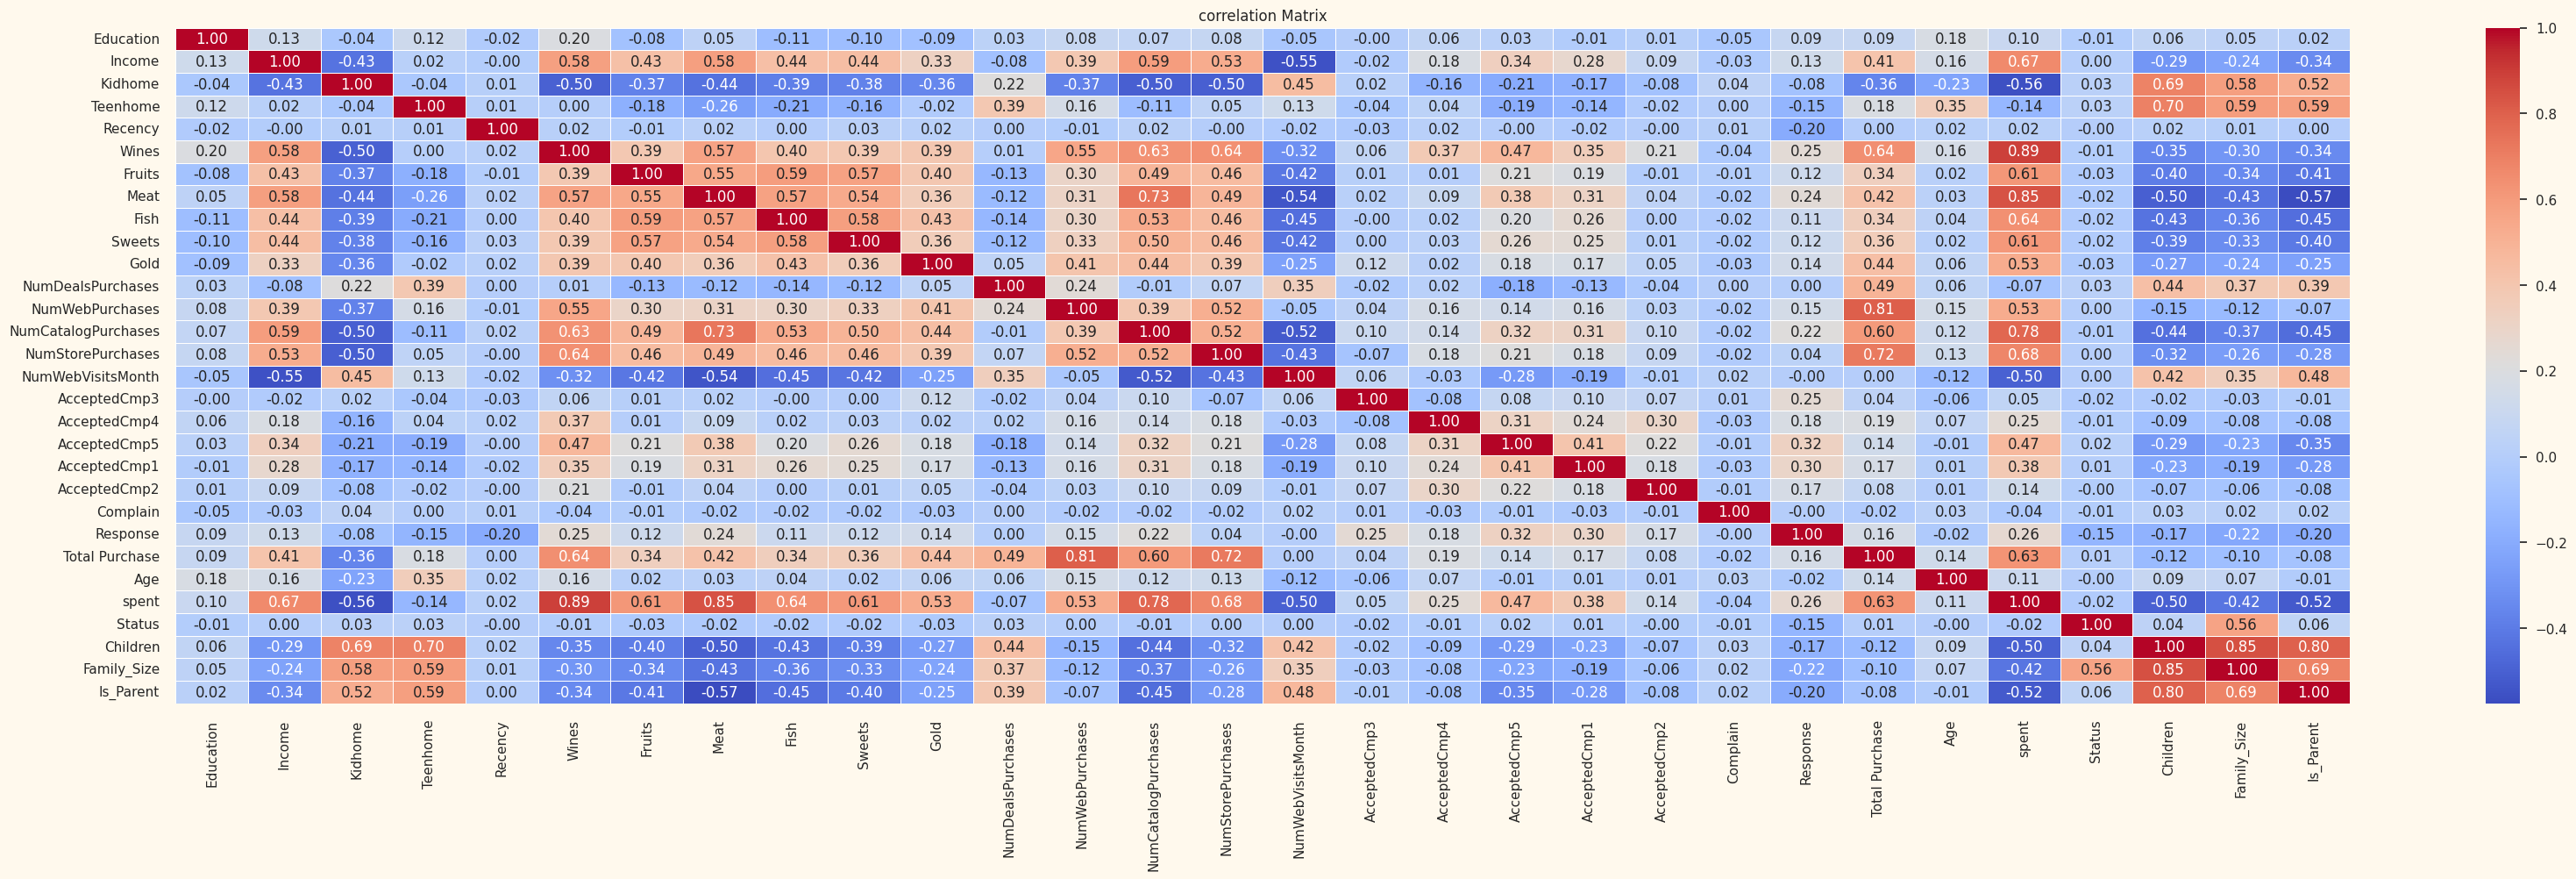

In [ ]:
corre=market.corr()
plt.figure(figsize=(40,10))
sns.heatmap(corre,annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.title('correlation Matrix')
plt.show()

In [ ]:
least_correlated_columns=corre.abs().unstack().sort_values().drop_duplicates().head(7)
print("Least Correlated Columns:")
print(least_correlated_columns)

Least Correlated Columns:
AcceptedCmp3       Fish            0.000219
NumStorePurchases  Recency         0.000434
AcceptedCmp5       Recency         0.000482
NumDealsPurchases  Complain        0.000497
Fish               Recency         0.000551
Recency            Status          0.001371
                   AcceptedCmp2    0.001400
dtype: float64


In [ ]:
print("Total categories in the featire Martial_status:\n",market["Status"].value_counts(),"\n")
print("Total categories in the feature Education:\n",market["Education"].value_counts())

Total categories in the featire Martial_status:
 Status
2    1430
1     786
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
2    1116
3     846
1     254
Name: count, dtype: int64


In [ ]:
market

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Total Purchase,Age,spent,Status,Children,Family_Size,Is_Parent
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,32,67,1617,1,0,1,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,11,70,27,1,2,3,1
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,25,59,776,2,0,2,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,14,40,53,2,1,3,1
4,3,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,24,43,422,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,23,57,1341,2,1,3,1
2236,3,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,29,78,444,2,3,5,1
2237,2,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,25,43,1241,1,0,1,0
2238,3,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,26,68,843,2,1,3,1


In [ ]:
market.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Total Purchase,Age,spent,Status,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.267148,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.013538,0.009477,0.150271,20.199910,55.179603,607.075361,1.645307,0.947202,2.592509,0.714350
std,0.652084,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.115588,0.096907,0.357417,7.283193,11.985554,602.900476,0.478528,0.749062,0.905722,0.451825
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,14.000000,47.000000,69.000000,1.000000,0.000000,2.000000,0.000000
50%,2.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,19.000000,54.000000,396.500000,2.000000,1.000000,3.000000,1.000000
75%,3.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,25.000000,65.000000,1048.000000,2.000000,1.000000,3.000000,1.000000
max,3.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,46.000000,131.000000,2525.000000,2.000000,3.000000,5.000000,1.000000


<Axes: >

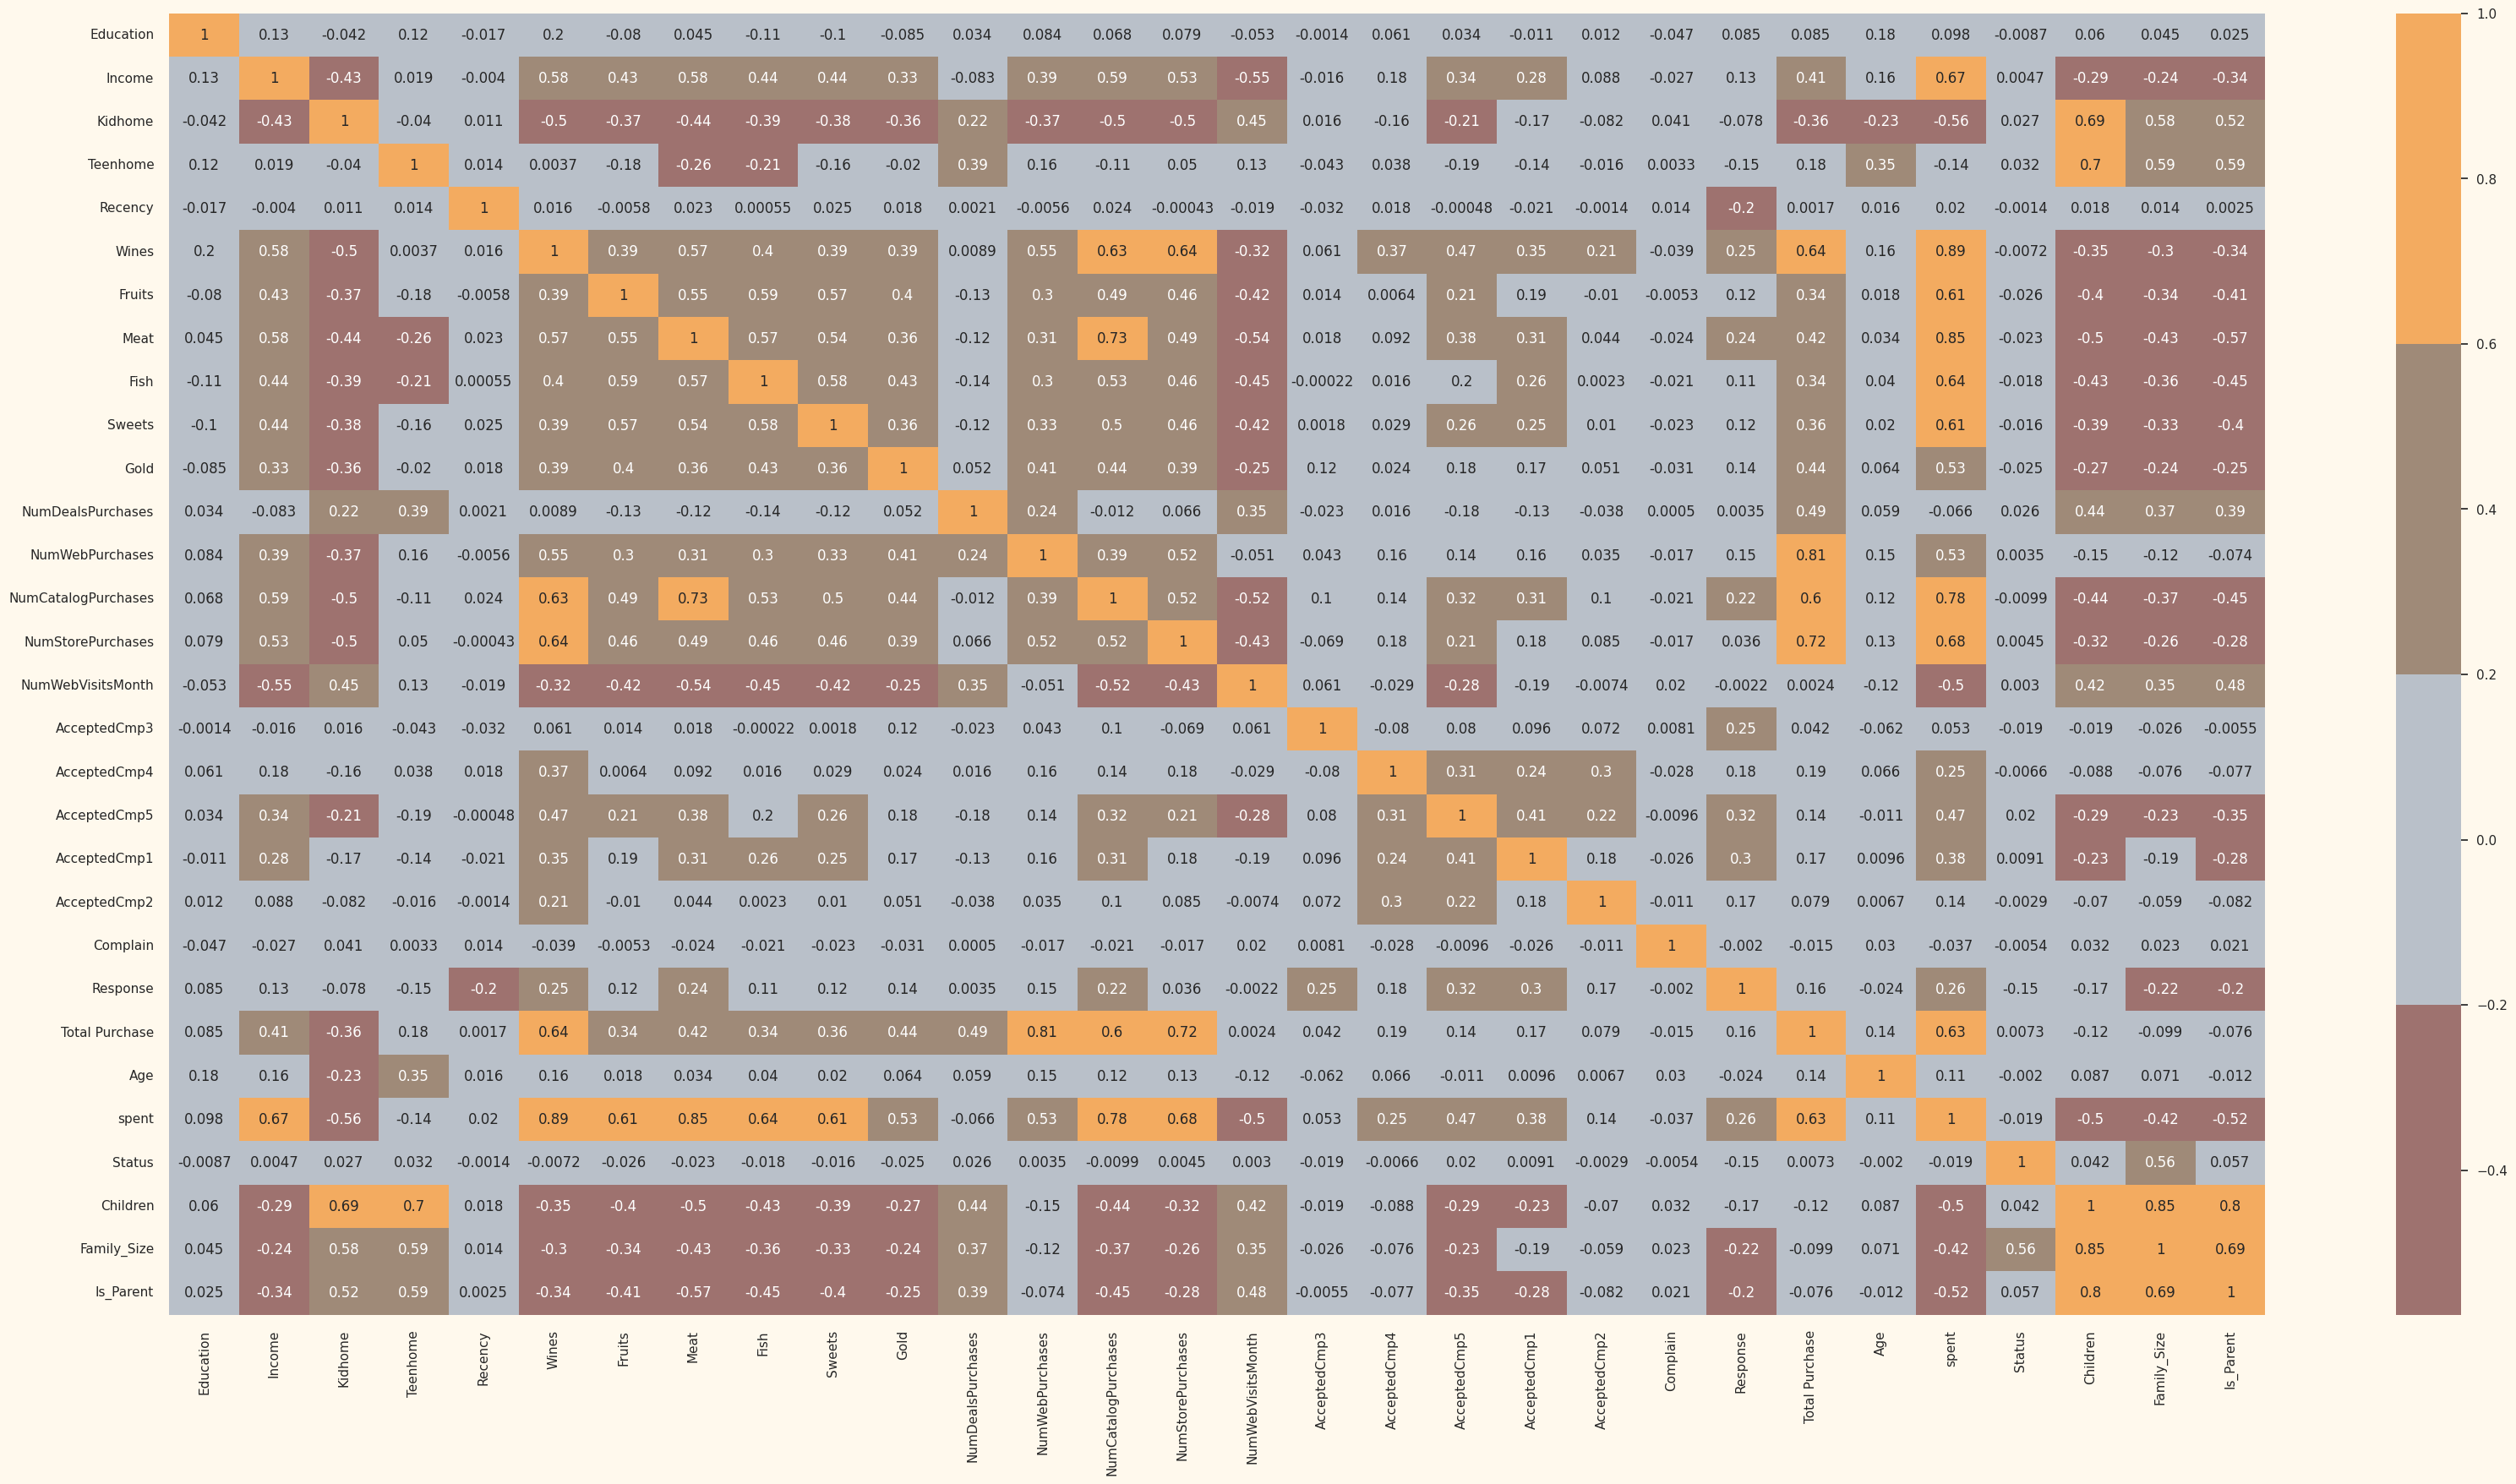

In [ ]:
corrmat= market.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
s=(market.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [ ]:
new=market.copy()
cols=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
new=new.drop(cols,axis=1)
scaler = StandardScaler()
scaler.fit(new)
scaled_new = pd.DataFrame(scaler.transform(new),columns= new.columns )


In [ ]:
scaled_new.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total Purchase,Age,spent,Status,Children,Family_Size,Is_Parent
0,-0.409776,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,1.620547,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.409776,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,-1.263455,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.409776,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,0.659213,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.409776,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-0.851455,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356
4,1.124115,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,0.521879,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356


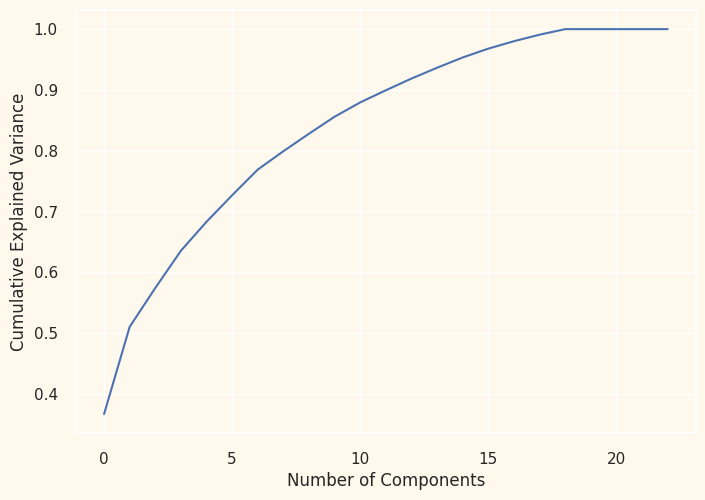

In [ ]:
pca = PCA().fit(scaled_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
n_components = 10  # Adjust based on your plot
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_new)

In [ ]:
final_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])


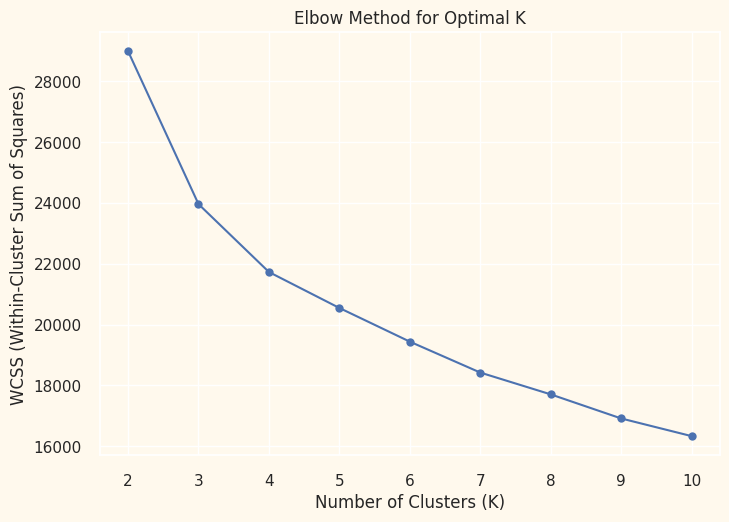

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K) using the Elbow Method
wcss = []
for k in range(2, 11):  # Testing for 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)  # Assuming PCA-reduced data

# Add cluster labels to DataFrame
final_pca_df["Cluster"] = clusters


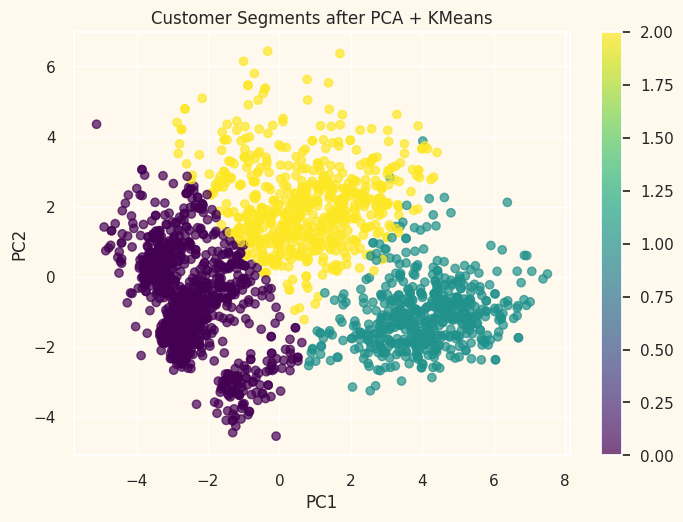

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments after PCA + KMeans")
plt.colorbar()
plt.show()


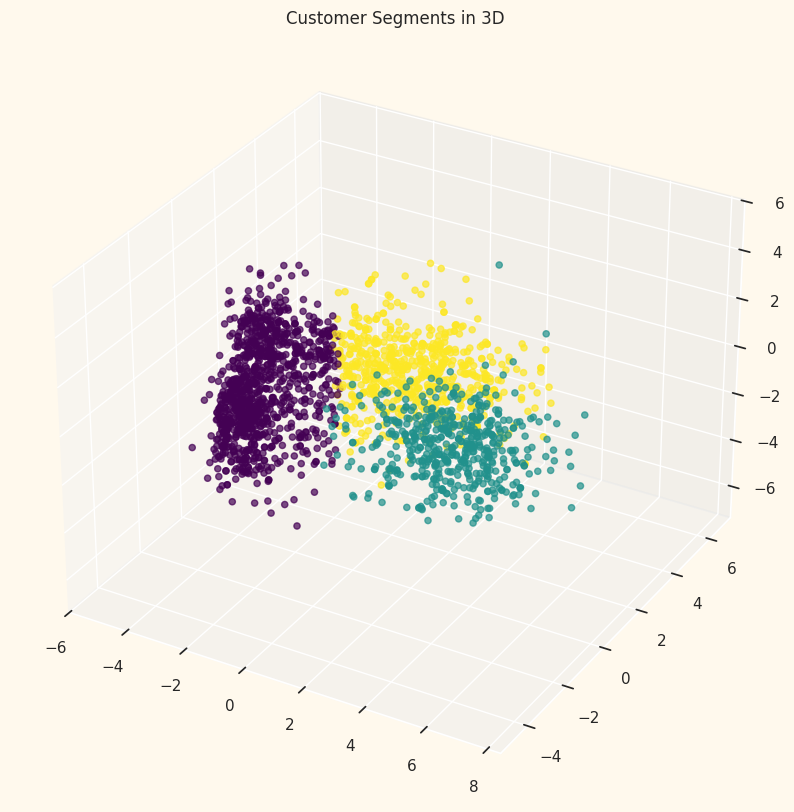

In [ ]:
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Customer Segments in 3D")
plt.show()


In [ ]:
centroids = pca.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=scaled_new.columns)
print(centroids_df)

   Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.109767 -0.665978  0.629135 -0.084220  0.010747 -0.786710 -0.533550   
1   0.049749  0.922472 -0.843368 -0.866927  0.010970  0.862702  0.999082   
2   0.142285  0.339333 -0.344259  0.873250 -0.027304  0.592481  0.052332   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0 -0.648914 -0.546679 -0.542380  ...            -0.729819          -0.769170   
1  1.321519  1.075924  0.974584  ...             1.154421           0.720558   
2 -0.026189  0.009502  0.087836  ...             0.250701           0.683033   

   NumWebVisitsMonth  Total Purchase       Age     spent    Status  Children  \
0           0.428661       -0.782467 -0.201651 -0.850292  0.002764  0.389754   
1          -1.058367        0.384646  0.050209  1.254215 -0.092554 -1.234299   
2           0.173810        0.988932  0.296157  0.368713  0.073493  0.387651   

   Family_Size  Is_Parent  
0     0.323800   0.361447

In [ ]:
centroids_df["Cluster"] = range(len(centroids_df))
print(centroids_df)


   Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.109767 -0.665978  0.629135 -0.084220  0.010747 -0.786710 -0.533550   
1   0.049749  0.922472 -0.843368 -0.866927  0.010970  0.862702  0.999082   
2   0.142285  0.339333 -0.344259  0.873250 -0.027304  0.592481  0.052332   

       Meat      Fish    Sweets  ...  NumStorePurchases  NumWebVisitsMonth  \
0 -0.648914 -0.546679 -0.542380  ...          -0.769170           0.428661   
1  1.321519  1.075924  0.974584  ...           0.720558          -1.058367   
2 -0.026189  0.009502  0.087836  ...           0.683033           0.173810   

   Total Purchase       Age     spent    Status  Children  Family_Size  \
0       -0.782467 -0.201651 -0.850292  0.002764  0.389754     0.323800   
1        0.384646  0.050209  1.254215 -0.092554 -1.234299    -1.069706   
2        0.988932  0.296157  0.368713  0.073493  0.387651     0.359430   

   Is_Parent  Cluster  
0   0.361447        0  
1  -1.299405        1  
2   0.490137 

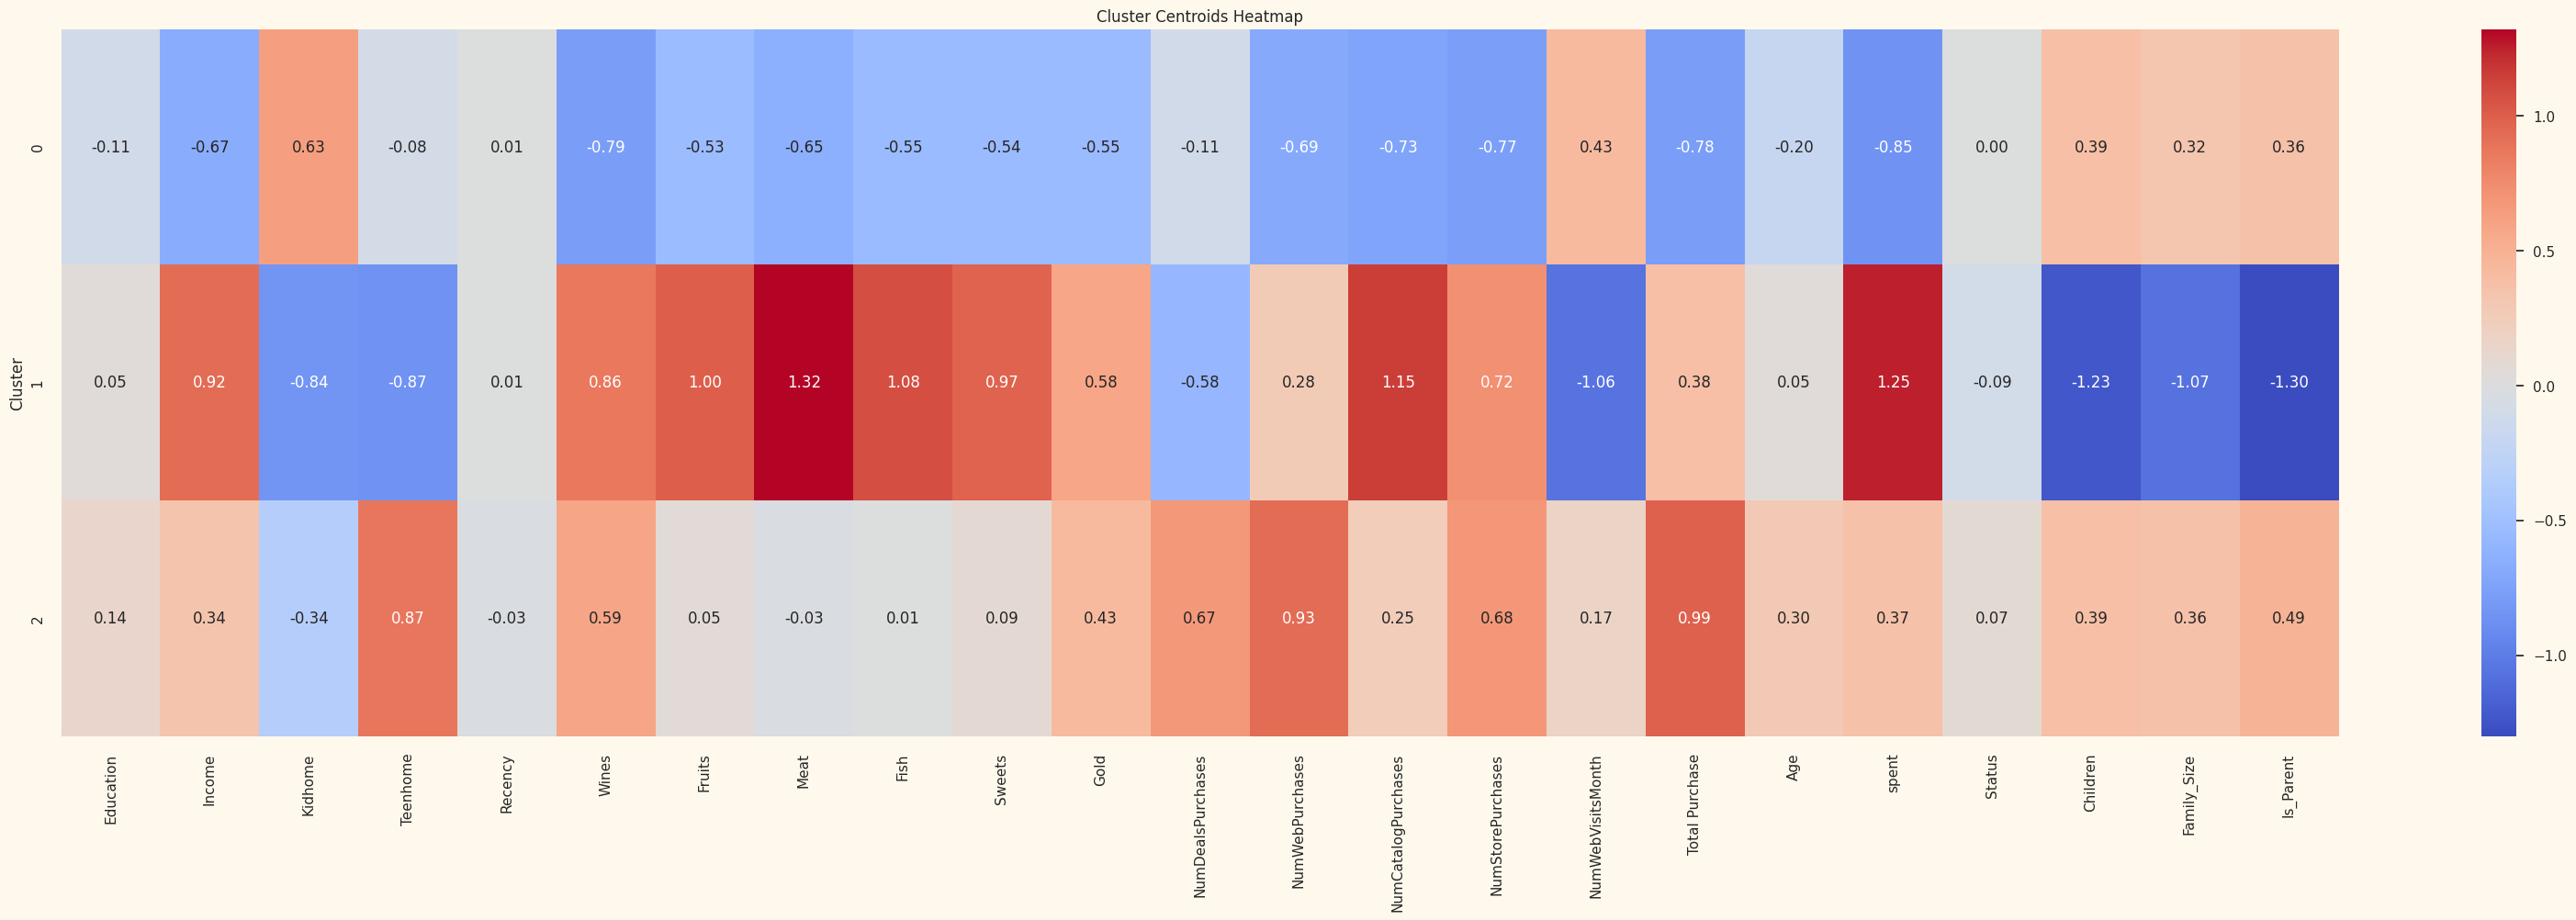

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
sns.heatmap(centroids_df.set_index("Cluster"), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Centroids Heatmap")
plt.show()


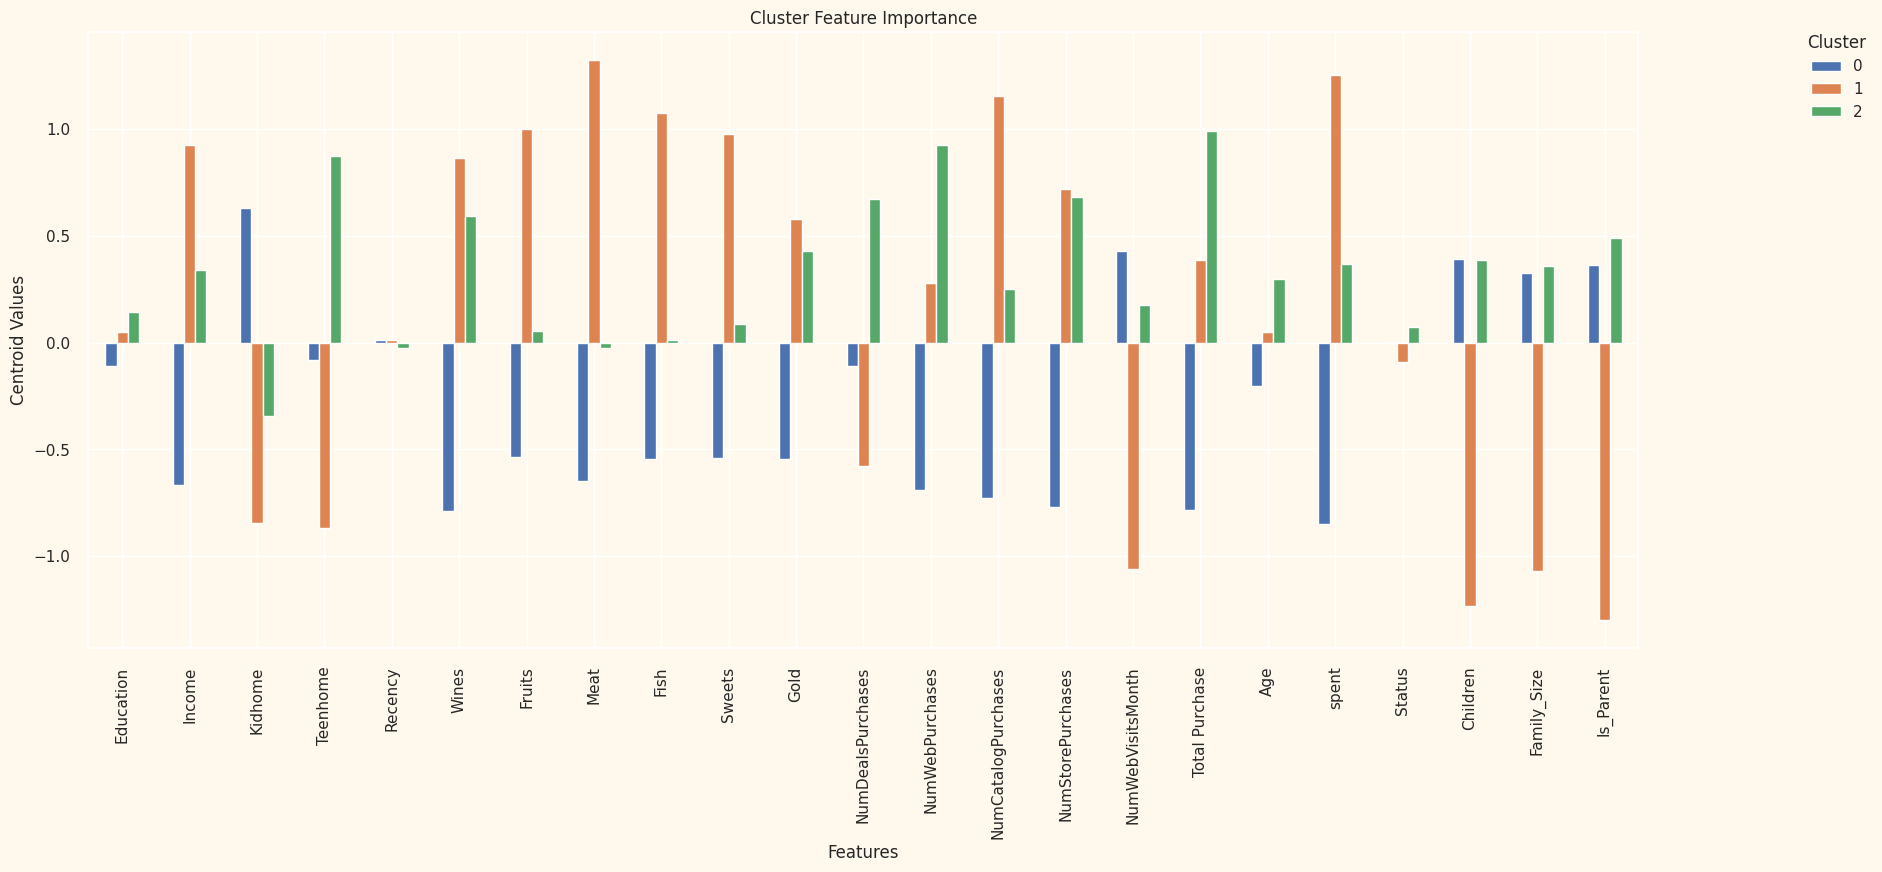

In [ ]:
centroids_df.set_index("Cluster").T.plot(kind='bar', figsize=(20,8), legend=True)
plt.xlabel("Features")
plt.ylabel("Centroid Values")
plt.title("Cluster Feature Importance")
plt.legend(title="Cluster", bbox_to_anchor=(1.1, 1.02), loc="upper left")
plt.show()


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# Ensure final_pca_df is defined and contains the PCA-transformed data
# Ensure `market` is also defined

### ---- 1. KMeans Clustering ---- ###
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
yhat_kmeans = kmeans.fit_predict(final_pca_df)

final_pca_df["KMeans_Clusters"] = yhat_kmeans
market["KMeans_Clusters"] = yhat_kmeans  # If `market` has the same data

kmeans_score = silhouette_score(final_pca_df.drop("KMeans_Clusters", axis=1), final_pca_df["KMeans_Clusters"])
print("Silhouette Score for KMeans:", kmeans_score)

### ---- 2. Agglomerative Clustering ---- ###
AC = AgglomerativeClustering(n_clusters=3)
yhat_AC = AC.fit_predict(final_pca_df)

final_pca_df["Agglo_Clusters"] = yhat_AC
market["Agglo_Clusters"] = yhat_AC  # Assign clusters to `market`

agglo_score = silhouette_score(final_pca_df.drop("Agglo_Clusters", axis=1), final_pca_df["Agglo_Clusters"])
print("Silhouette Score for Agglomerative Clustering:", agglo_score)

### ---- 3. DBSCAN Clustering ---- ###
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune hyperparameters as needed
yhat_dbscan = dbscan.fit_predict(final_pca_df)

final_pca_df["DBSCAN_Clusters"] = yhat_dbscan
market["DBSCAN_Clusters"] = yhat_dbscan  # Assign clusters to `market`

# Silhouette Score for DBSCAN (only if there are multiple clusters)
if len(set(yhat_dbscan)) > 1:
    dbscan_score = silhouette_score(final_pca_df.drop("DBSCAN_Clusters", axis=1), final_pca_df["DBSCAN_Clusters"])
    print("Silhouette Score for DBSCAN:", dbscan_score)
else:
    print("DBSCAN assigned all points to the same cluster or noise, so silhouette score is not meaningful.")


Silhouette Score for KMeans: 0.29629574690358335
Silhouette Score for Agglomerative Clustering: 0.3169767794143011
Silhouette Score for DBSCAN: -0.18684744269718323


In [ ]:
for n_clusters in range(2, 7):  # Test cluster numbers from 2 to 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    yhat_AC= kmeans.fit_predict(final_pca_df)
    score = silhouette_score(final_pca_df, yhat_AC)
    print(f"Silhouette Score for KMeans (n_clusters={n_clusters}):", score)

Silhouette Score for KMeans (n_clusters=2): 0.324237581256459
Silhouette Score for KMeans (n_clusters=3): 0.32625432807172644
Silhouette Score for KMeans (n_clusters=4): 0.23076290539220123
Silhouette Score for KMeans (n_clusters=5): 0.19534573317607828
Silhouette Score for KMeans (n_clusters=6): 0.198563304904427


In [ ]:
for n_clusters in range(2, 7):  # Test cluster numbers from 2 to 6
    AC = AgglomerativeClustering(n_clusters=n_clusters)  # Corrected
    yhat_AC = AC.fit_predict(final_pca_df)  # Corrected
    score = silhouette_score(final_pca_df, yhat_AC)  # Corrected

    print(f"Silhouette Score for Agglomerative Clustering (n_clusters={n_clusters}): {score}")


Silhouette Score for Agglomerative Clustering (n_clusters=2): 0.32332351392201764
Silhouette Score for Agglomerative Clustering (n_clusters=3): 0.32415479065753383
Silhouette Score for Agglomerative Clustering (n_clusters=4): 0.22599406191686844
Silhouette Score for Agglomerative Clustering (n_clusters=5): 0.18367027841890843
Silhouette Score for Agglomerative Clustering (n_clusters=6): 0.1846122428673919


In [ ]:
AC = AgglomerativeClustering(n_clusters=3)
yhat_AC = AC.fit_predict(final_pca_df)
final_pca_df["Clusters"] = yhat_AC
market["Clusters"]=yhat_AC

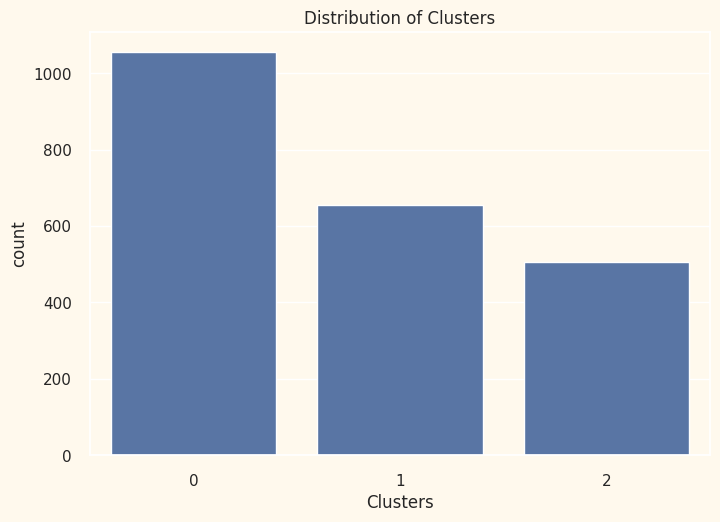

In [ ]:
sn=sns.countplot(x=market["Clusters"])
sn.set_title("Distribution of Clusters")
plt.show()

<ipython-input-194-69ca70f66513>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=market["Clusters"], y=market["spent"], palette="coolwarm")


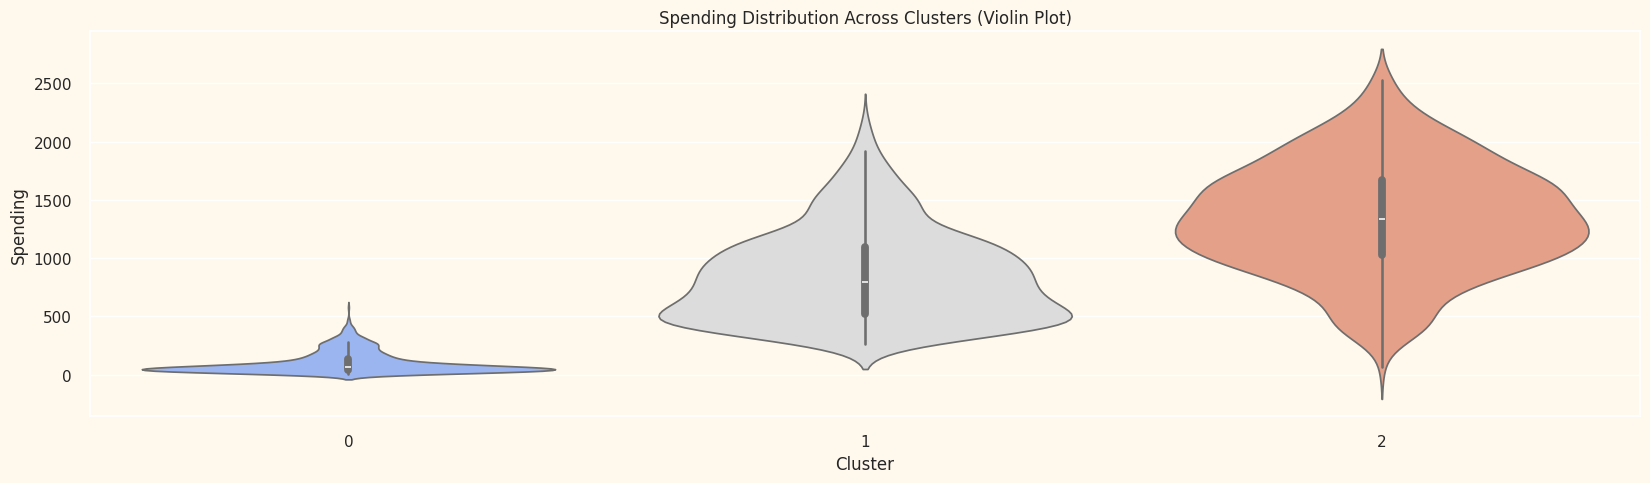

In [ ]:
plt.figure(figsize=(20, 5))
sns.violinplot(x=market["Clusters"], y=market["spent"], palette="coolwarm")
plt.title("Spending Distribution Across Clusters (Violin Plot)")
plt.xlabel("Cluster")
plt.ylabel("Spending")
plt.show()

<ipython-input-195-03ff70e8949e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=market["Clusters"], y=market["Income"], palette="coolwarm")


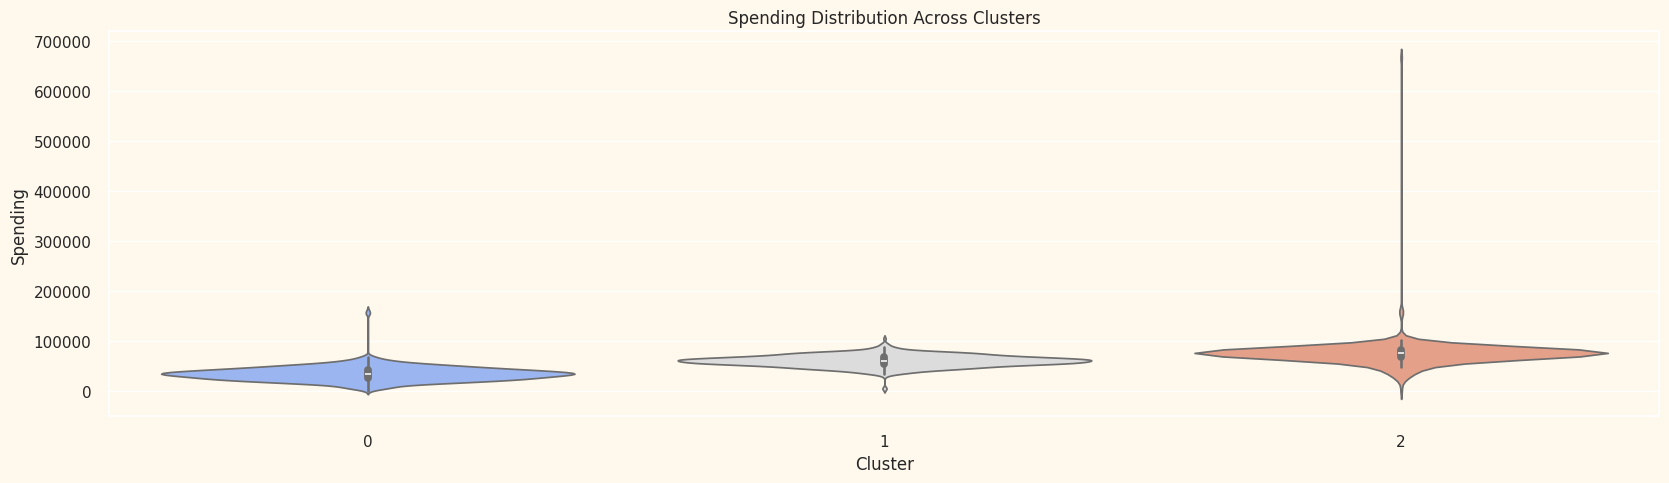

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.violinplot(x=market["Clusters"], y=market["Income"], palette="coolwarm")
plt.title("Spending Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Spending")
plt.show()


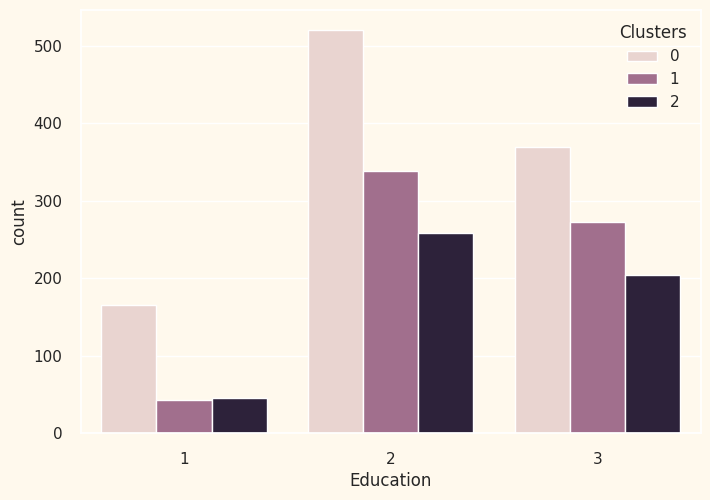

In [ ]:
plt.figure()
sn=sns.countplot(x=market['Education'],hue=market['Clusters'])
plt.show()

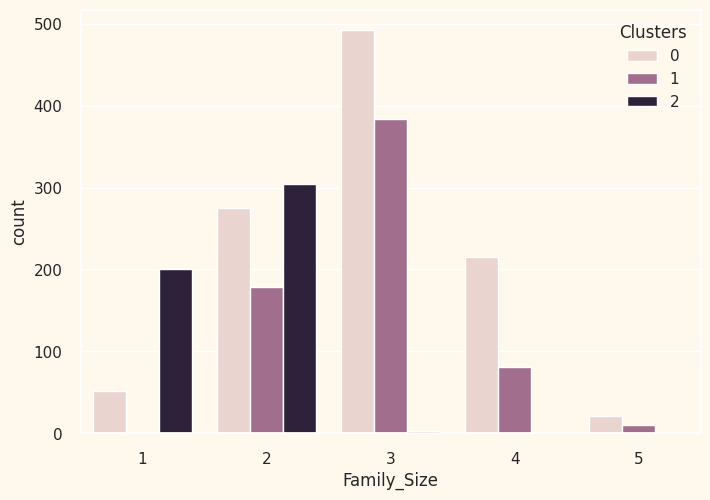

In [ ]:
plt.figure()
sn=sns.countplot(x=market['Family_Size'],hue=market['Clusters'])
plt.show()

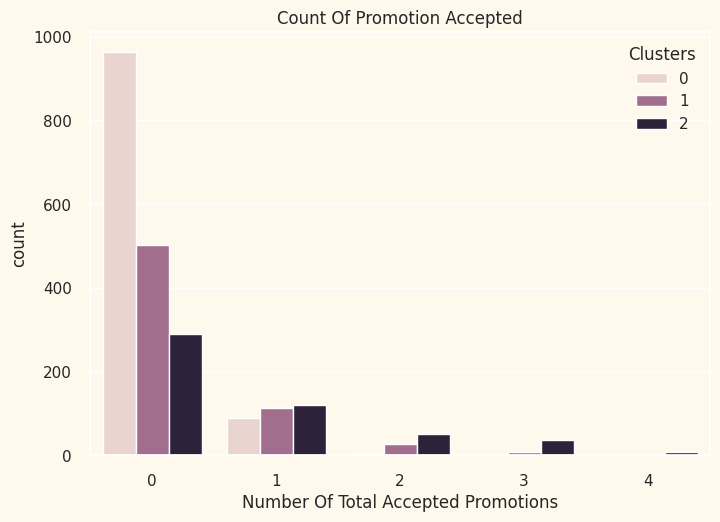

In [ ]:
market["Total_Promos"] = market["AcceptedCmp1"]+ market["AcceptedCmp2"]+ market["AcceptedCmp3"]+ market["AcceptedCmp4"]+ market["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=market["Total_Promos"],hue=market["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
market['Total Purchase']=market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']

<Figure size 800x550 with 0 Axes>

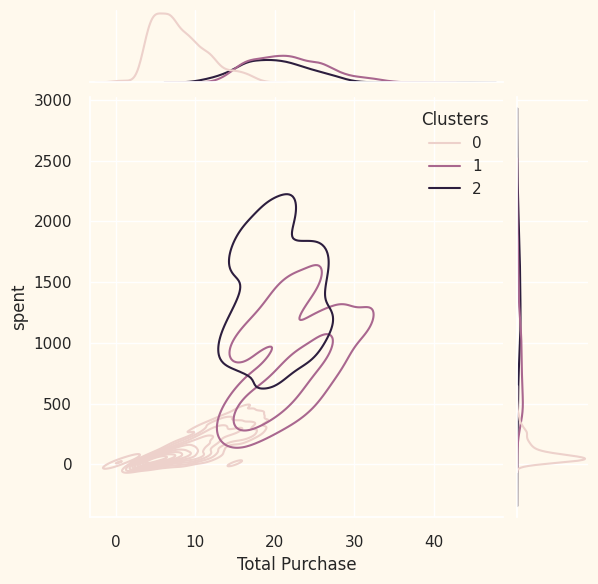

<Figure size 800x550 with 0 Axes>

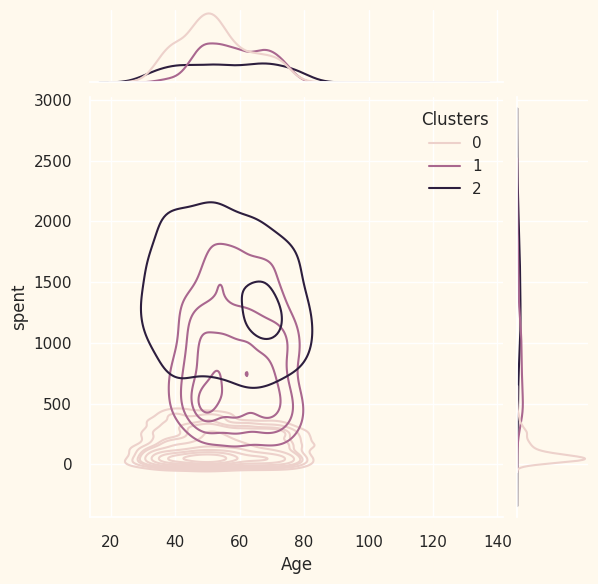

<Figure size 800x550 with 0 Axes>

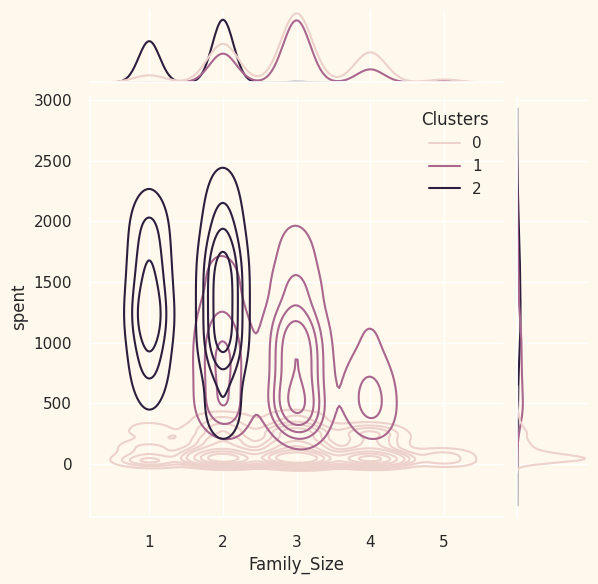

<Figure size 800x550 with 0 Axes>

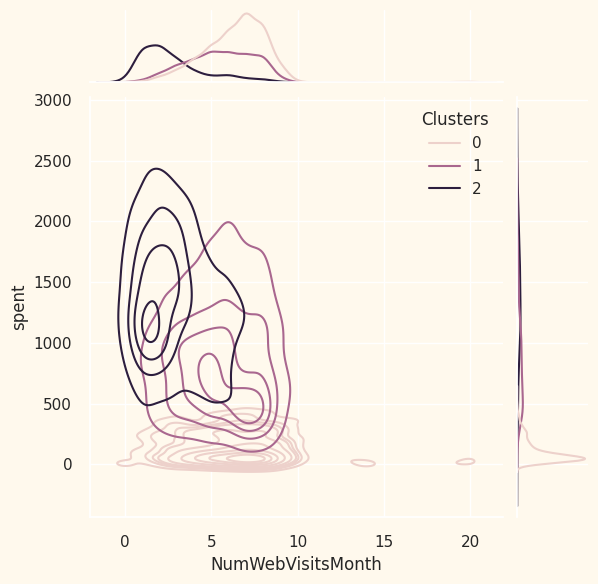

<Figure size 800x550 with 0 Axes>

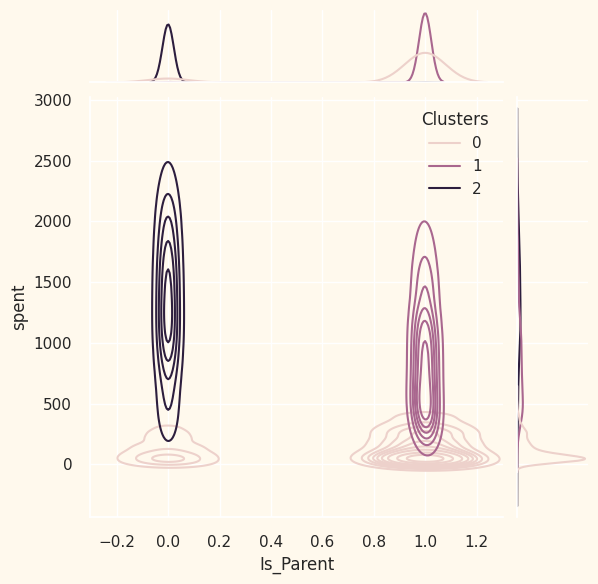

In [ ]:
Personal=['Total Purchase','Age','Family_Size','NumWebVisitsMonth','Is_Parent']
for i in Personal:
  plt.figure()
  sns.jointplot(x=market[i],y=market['spent'],hue=market['Clusters'],kind="kde")

  plt.show()